# 1.Overview of Problem Statement

# 2. Objective of the project

# 3. Data Description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_breast_cancer

In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 4. Data Collection

In [5]:
# Data Collection
# The data is sourced from the sklearn.datasets module, which provides a preloaded Breast Cancer dataset.
print("Shape of the dataset:", df.shape)
print("Features in the dataset:\n", data.feature_names)

Shape of the dataset: (569, 31)
Features in the dataset:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# 5. Data  Preprocessing - Data Cleaning

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

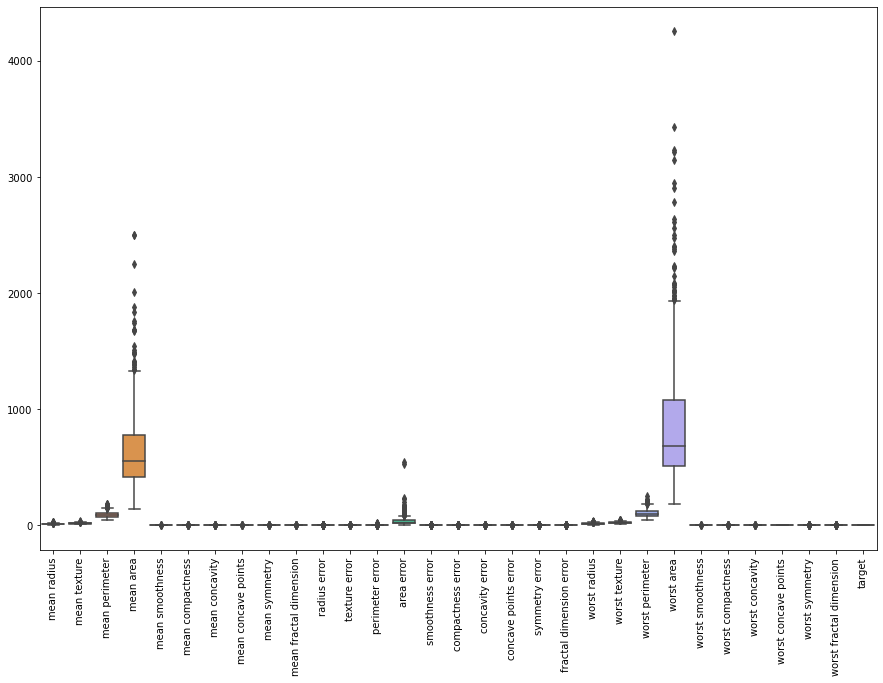

In [8]:
# Detect outliers visually using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Remove outliers based on Z-score (optional if too many outliers skew the data)
from scipy import stats
df = df[(np.abs(stats.zscore(df.iloc[:, :-1])) < 3).all(axis=1)]

In [9]:
# Check skewness of each feature
print(df.skew())

# Apply log transformation if skewed (example)
df['mean area'] = np.log1p(df['mean area'])  # Just an example for one feature


mean radius                0.712362
mean texture               0.431119
mean perimeter             0.732779
mean area                  1.143507
mean smoothness            0.232561
mean compactness           0.764375
mean concavity             1.148972
mean concave points        1.026911
mean symmetry              0.329311
mean fractal dimension     0.596993
radius error               1.580303
texture error              0.747512
perimeter error            1.656852
area error                 1.930293
smoothness error           1.151489
compactness error          1.168899
concavity error            1.081837
concave points error       0.609499
symmetry error             1.129105
fractal dimension error    1.375670
worst radius               0.912895
worst texture              0.267705
worst perimeter            0.912860
worst area                 1.350034
worst smoothness           0.227603
worst compactness          0.992620
worst concavity            0.828316
worst concave points       0

# 6. EDA

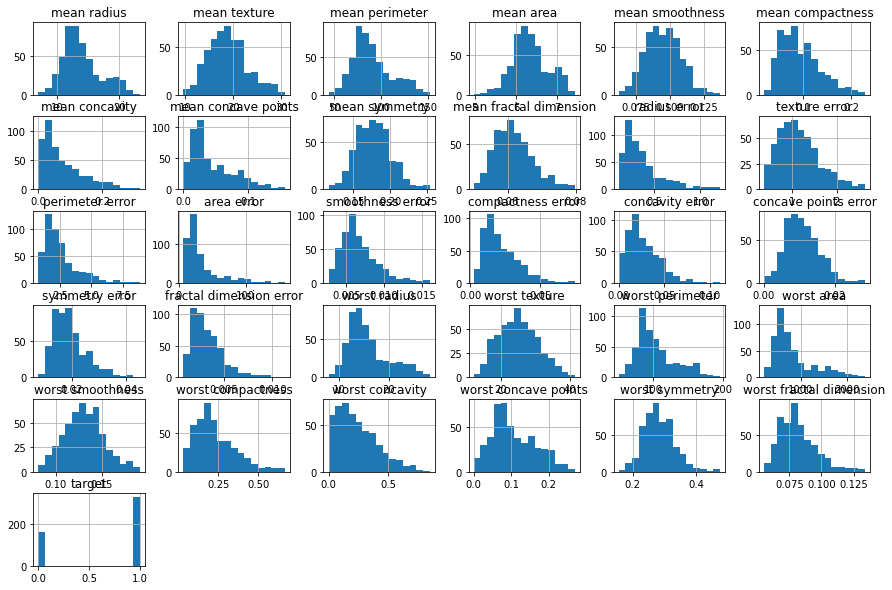

In [10]:
#Histogram
df.hist(bins=15, figsize=(15, 10))
plt.show()

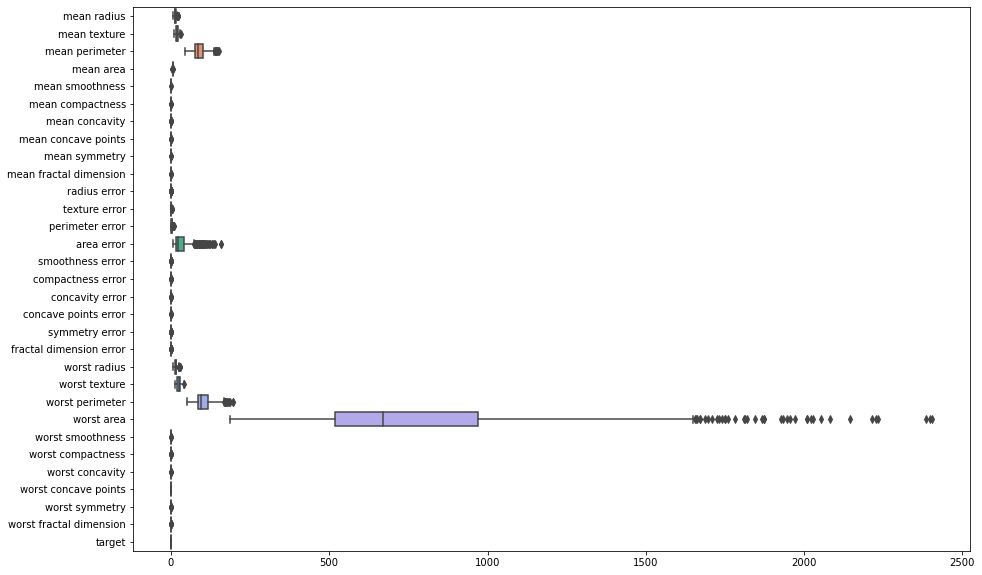

In [11]:
#Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.show()

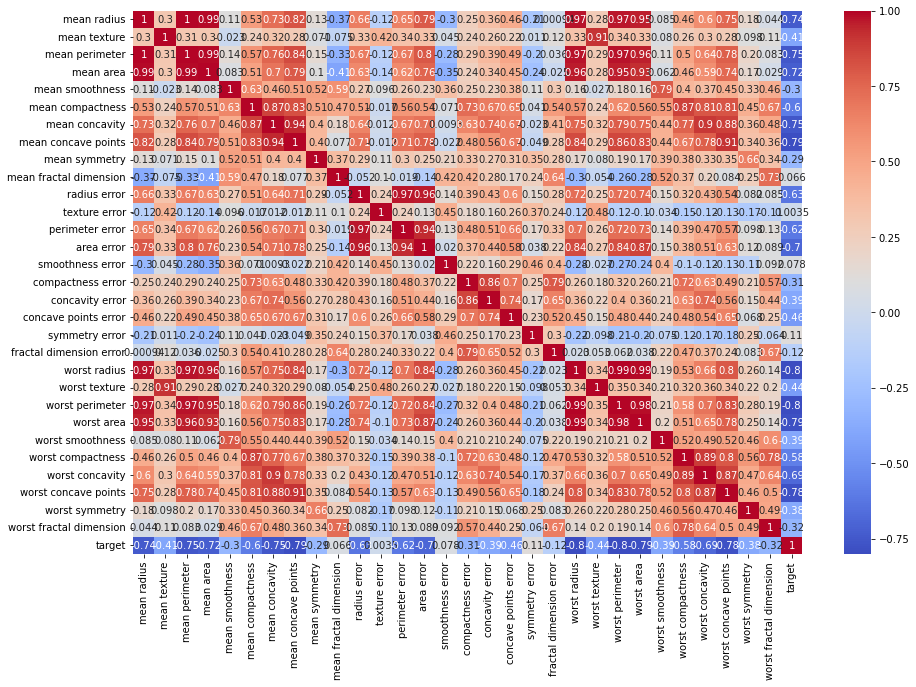

In [12]:
#Heat map
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

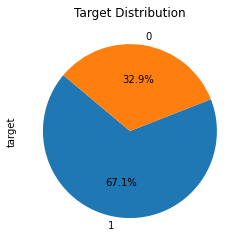

In [13]:
#Pie chart
df['target'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Target Distribution")
plt.show()

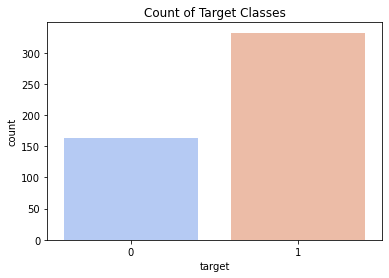

In [14]:
#Count plot
sns.countplot(x='target', data=df, palette="coolwarm")
plt.title("Count of Target Classes")
plt.show()

# 7. Feature Engineer

In [15]:
# Encoding target variable (if not already numeric)
df['target'] = df['target'].astype(int)

# Example: Apply transformations or create new features
df['mean area sqrt'] = np.sqrt(df['mean area'])


# 8. Feature Selection

In [16]:
# Feature Selection using correlation
correlation = df.corr()
relevant_features = correlation['target'][abs(correlation['target']) > 0.3]
print("Relevant features:\n", relevant_features)

Relevant features:
 mean radius               -0.741254
mean texture              -0.407111
mean perimeter            -0.754245
mean area                 -0.724296
mean smoothness           -0.304018
mean compactness          -0.602065
mean concavity            -0.752845
mean concave points       -0.790748
radius error              -0.630331
perimeter error           -0.618081
area error                -0.695619
compactness error         -0.309126
concavity error           -0.390394
concave points error      -0.457603
worst radius              -0.795813
worst texture             -0.443358
worst perimeter           -0.801401
worst area                -0.785407
worst smoothness          -0.387885
worst compactness         -0.583941
worst concavity           -0.688232
worst concave points      -0.779945
worst symmetry            -0.383165
worst fractal dimension   -0.316421
target                     1.000000
mean area sqrt            -0.719079
Name: target, dtype: float64


# 9. Split Data

In [17]:
#Train-Test Split
X = df.drop(columns=['target'])
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 10. Feature Scaling

In [11]:
#Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Feature selection
from sklearn.feature_selection import SelectKBest,f_classif
import pandas as pd
feature_names=data.feature_names

In [13]:
# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

feature_names = data.feature_names

# Feature Selection using SelectKBest
def perform_feature_selection(X_train, X_test, y_train, k=10):
    # Initialize SelectKBest with f_classif scoring function
    selector = SelectKBest(score_func=f_classif, k=k)
    
    # Fit and transform the training data
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Transform the test data
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = feature_names[selected_features_mask]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    return X_train_selected, X_test_selected, selected_features, feature_scores

# Perform feature selection
k_features = 10
X_train_selected, X_test_selected, selected_features, feature_scores = perform_feature_selection(
    X_train_scaled, X_test_scaled, y_train, k=k_features
)


In [14]:
print("\nTop 10 Selected Features:")
print("-" * 50)
for i, feature in enumerate(selected_features, 1):
    score = feature_scores[feature_scores['Feature'] == feature]['Score'].values[0]
    print(f"{i}. {feature}: {score:.2f}")


Top 10 Selected Features:
--------------------------------------------------
1. mean radius: 385.20
2. mean perimeter: 417.78
3. mean area: 351.63
4. mean concavity: 426.04
5. mean concave points: 533.50
6. worst radius: 556.11
7. worst perimeter: 570.40
8. worst area: 519.34
9. worst concavity: 311.51
10. worst concave points: 509.32


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

# 11. Build ML models and evaluation

# Logistic Regression

In [16]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
ypred_LR=model_LR.predict(X_test)

In [18]:
accuracy_LR=accuracy_score(y_test,ypred_LR)
accuracy_LR

0.9395973154362416

In [19]:
#Classification report
print("\nClassification Report:")
print(classification_report(y_test,ypred_LR))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        56
           1       0.96      0.95      0.95        93

    accuracy                           0.94       149
   macro avg       0.93      0.94      0.94       149
weighted avg       0.94      0.94      0.94       149



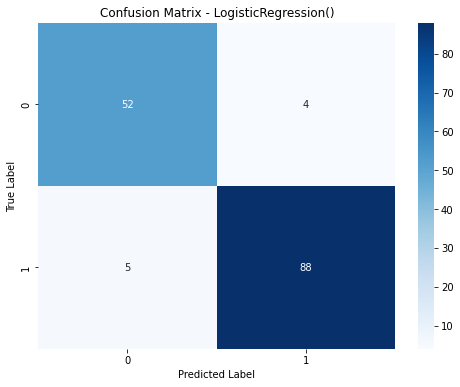

In [20]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_LR}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(max_depth=3,random_state=42,criterion='entropy')
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [22]:
ypred_DT=model_DT.predict(X_test)
accuracy_DT=accuracy_score(y_test,ypred_DT)
accuracy_DT

0.9060402684563759

In [23]:
#Classification report
print("\nClassification Report:")
print(classification_report(y_test,ypred_DT))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        56
           1       0.92      0.92      0.92        93

    accuracy                           0.91       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.91      0.91      0.91       149



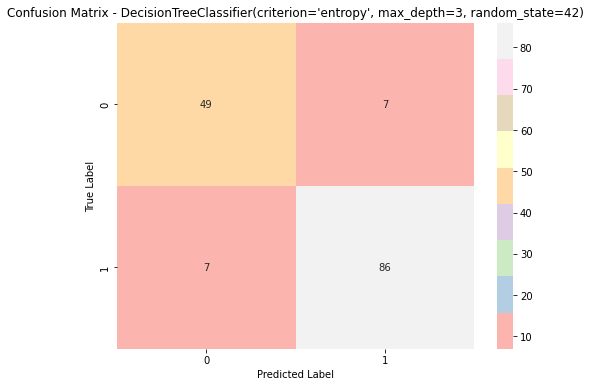

In [24]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1')
plt.title(f'Confusion Matrix - {model_DT}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(random_state=42)
model_RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
ypred_RF=model_RF.predict(X_test)
accuracy_RF=accuracy_score(y_test,ypred_DT)
accuracy_RF

0.9060402684563759

In [33]:
# Get feature importance
importances = model_RF.feature_importances_
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                    Feature  Importance
23               worst area    0.154667
27     worst concave points    0.123071
22          worst perimeter    0.088248
6            mean concavity    0.085872
20             worst radius    0.081128
2            mean perimeter    0.060191
7       mean concave points    0.058904
3                 mean area    0.056791
0               mean radius    0.054475
26          worst concavity    0.039845
13               area error    0.026772
25        worst compactness    0.024882
1              mean texture    0.018280
10             radius error    0.016249
21            worst texture    0.015624
24         worst smoothness    0.014632
5          mean compactness    0.012015
12          perimeter error    0.009328
28           worst symmetry    0.008239
4           mean smoothness    0.007430
29  worst fractal dimension    0.006637
8             mean symmetry    0.005067
11            texture error    0.005027
15        compactness error    0.004880


In [27]:
y_truth=y_test
y_predicted=model_RF.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_truth,y_predicted)
cm

array([[53,  3],
       [ 2, 91]], dtype=int64)

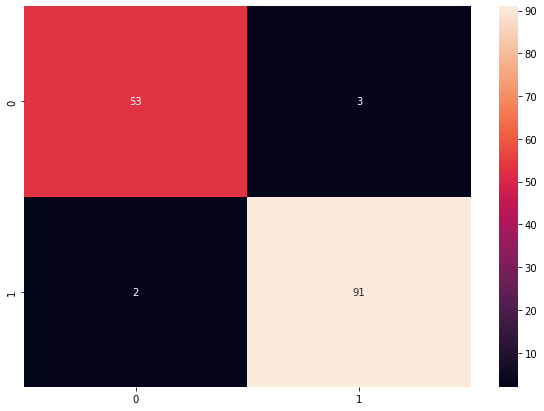

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.show()

# Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC
model_SVC=SVC()
model_SVC.fit(X_train,y_train)

SVC()

In [30]:
ypred_SVC=model_SVC.predict(X_test)
accuracy_SVC=accuracy_score(y_test,ypred_DT)
accuracy_SVC

0.9060402684563759

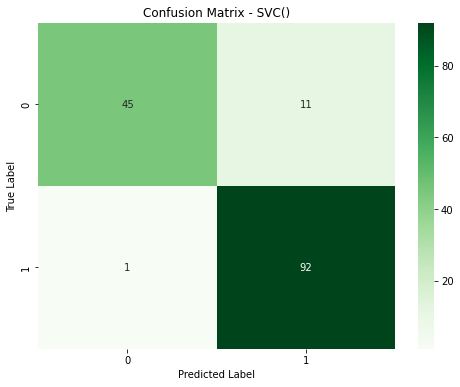

In [49]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_SVC)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix - {model_SVC}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [44]:
#Linear kernal
model_SVC=SVC(kernel='linear')
model_SVC.fit(X_train,y_train)
ypred=model_SVC.predict(X_test)
print('Accuracy of our Linear kernal model is', accuracy_score(y_test,ypred))

Accuracy of our Linear kernal model is 0.9463087248322147


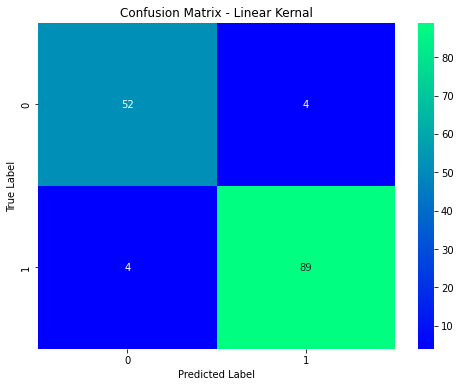

In [53]:
# Plot confusion matrix of linear kernal
cm = confusion_matrix(y_test, ypred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='winter')
plt.title(f'Confusion Matrix - Linear Kernal')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [43]:
#Polynomial kernal
model_SVC=SVC(kernel='poly',degree=3)
model_SVC.fit(X_train,y_train)
yprd=model_SVC.predict(X_test)
print('Accuracy of our polynomial kernal model is',accuracy_score(y_test,yprd))

Accuracy of our polynomial kernal model is 0.9194630872483222


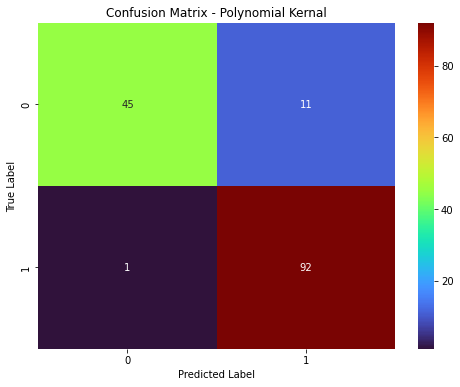

In [54]:
# Plot confusion matrix of polynomial kernal
cm = confusion_matrix(y_test, yprd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='turbo')
plt.title(f'Confusion Matrix - Polynomial Kernal')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [55]:
#Gaussian Model
model_SVC=SVC(kernel='rbf')
model_SVC.fit(X_train,y_train)
ypredict=model_SVC.predict(X_test)
print("Accuracy of our Gaussian model is",accuracy_score(y_test,ypredict))

Accuracy of our Gaussian model is 0.9194630872483222


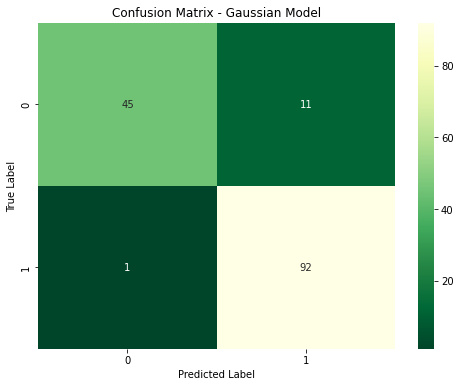

In [57]:
# Plot confusion matrix of Gaussian Model
cm = confusion_matrix(y_test, ypredict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn_r')
plt.title(f'Confusion Matrix - Gaussian Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# K-Nearest Neighbors (k-NN)

In [25]:
#fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
ypred_classifier=classifier.predict(X_test)
accuracy_classifier=accuracy_score(y_test,ypred_classifier)
accuracy_classifier

0.912751677852349

# Model Comparison

In [19]:
# 11. Build and evaluate models
print("\nTraining models...")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Define classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=1000)
}



Training models...


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize results dictionary
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    
    # 12. Model Evaluation
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist()  # Converting to list for better readability
    }
    
    # Print evaluation metrics for each model
    print(f"{name} Results:")
    print(f"Accuracy: {results[name]['Accuracy']:.4f}")
    print(f"Precision: {results[name]['Precision']:.4f}")
    print(f"Recall: {results[name]['Recall']:.4f}")
    print(f"F1-Score: {results[name]['F1-Score']:.4f}")
    print("Confusion Matrix:\n", results[name]['Confusion Matrix'])



Training Logistic Regression...


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 0.9396
Precision: 0.9395
Recall: 0.9396
F1-Score: 0.9395
Confusion Matrix:
 [[51, 5], [4, 89]]

Training SVM...
SVM Results:
Accuracy: 0.9195
Precision: 0.9252
Recall: 0.9195
F1-Score: 0.9176
Confusion Matrix:
 [[45, 11], [1, 92]]

Training Random Forest...
Random Forest Results:
Accuracy: 0.9664
Precision: 0.9664
Recall: 0.9664
F1-Score: 0.9664
Confusion Matrix:
 [[53, 3], [2, 91]]

Training Gradient Boosting...
Gradient Boosting Results:
Accuracy: 0.9664
Precision: 0.9664
Recall: 0.9664
F1-Score: 0.9664
Confusion Matrix:
 [[53, 3], [2, 91]]

Training MLP Classifier...
MLP Classifier Results:
Accuracy: 0.9463
Precision: 0.9463
Recall: 0.9463
F1-Score: 0.9463
Confusion Matrix:
 [[52, 4], [4, 89]]


In [23]:
# Find the best model based on Accuracy (or F1-Score for imbalanced datasets)
best_model_name = max(results.items(), key=lambda x: x[1]['Accuracy'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")



Best Model: Random Forest


In [27]:
#Worst model 

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize results dictionary
results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Save results
    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
    }

# Identify the worst model based on Accuracy
worst_model_name = min(results.items(), key=lambda x: x[1]['Accuracy'])[0]
print(f"\nWorst Model Based on Accuracy: {worst_model_name}")

# Identify the worst model based on F1-Score
worst_model_f1 = min(results.items(), key=lambda x: x[1]['F1-Score'])[0]
print(f"Worst Model Based on F1-Score: {worst_model_f1}")

# Display all results
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}, F1-Score = {metrics['F1-Score']:.4f}")



Evaluating Logistic Regression...

Evaluating SVM...

Evaluating Random Forest...

Evaluating Gradient Boosting...

Evaluating MLP Classifier...

Worst Model Based on Accuracy: SVM
Worst Model Based on F1-Score: SVM
Logistic Regression: Accuracy = 0.9396, F1-Score = 0.9395
SVM: Accuracy = 0.9195, F1-Score = 0.9176
Random Forest: Accuracy = 0.9664, F1-Score = 0.9664
Gradient Boosting: Accuracy = 0.9664, F1-Score = 0.9664
MLP Classifier: Accuracy = 0.9463, F1-Score = 0.9463


# 12. Interpretation of Results

# 13. Future Work